In [166]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.datasets
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [167]:
data=pd.read_csv('tips.csv')

In [168]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [169]:
data.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [170]:
data.shape

(244, 7)

In [171]:
data.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [172]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [173]:
data['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [174]:
data['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [175]:
data['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [176]:
data['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [177]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [178]:
data=data.replace({'sex':{'Male':0,'Female':1}})

In [179]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,No,Sun,Dinner,2
1,10.34,1.66,0,No,Sun,Dinner,3
2,21.01,3.50,0,No,Sun,Dinner,3
3,23.68,3.31,0,No,Sun,Dinner,2
4,24.59,3.61,1,No,Sun,Dinner,4


In [180]:
data=data.replace({'smoker':{'No':0,'Yes':1}})

In [181]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,Sun,Dinner,2
1,10.34,1.66,0,0,Sun,Dinner,3
2,21.01,3.50,0,0,Sun,Dinner,3
3,23.68,3.31,0,0,Sun,Dinner,2
4,24.59,3.61,1,0,Sun,Dinner,4


In [182]:
data=data.replace({'day':{'Sat':0,'Sun':1,'Thur':2,'Fri':3}})

In [183]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,1,Dinner,2
1,10.34,1.66,0,0,1,Dinner,3
2,21.01,3.50,0,0,1,Dinner,3
3,23.68,3.31,0,0,1,Dinner,2
4,24.59,3.61,1,0,1,Dinner,4


In [184]:
data=data.replace({'time':{'Dinner':0,'Lunch':1}})

In [185]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,1,0,2
1,10.34,1.66,0,0,1,0,3
2,21.01,3.50,0,0,1,0,3
3,23.68,3.31,0,0,1,0,2
4,24.59,3.61,1,0,1,0,4


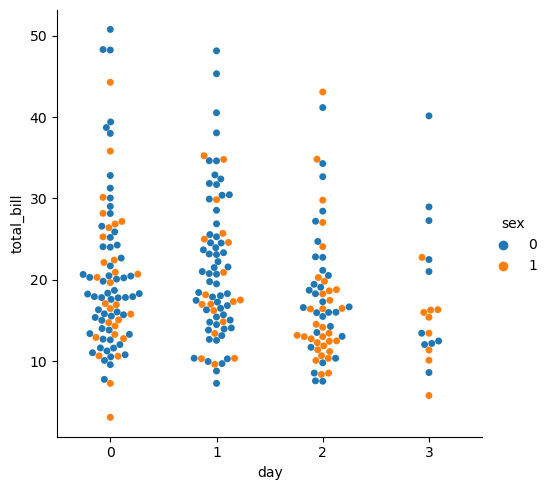

In [186]:
sns.catplot(data=data,x='day',y='total_bill',kind='swarm',hue='sex')

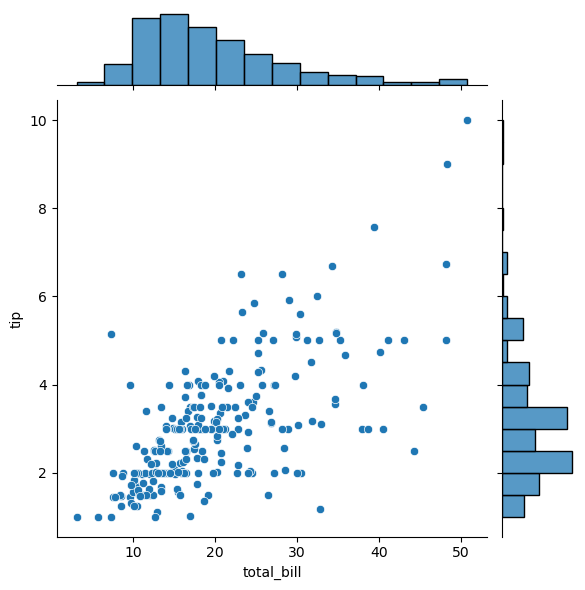

In [187]:
sns.jointplot(data=data,x='total_bill',y='tip')

<Axes: xlabel='sex', ylabel='count'>

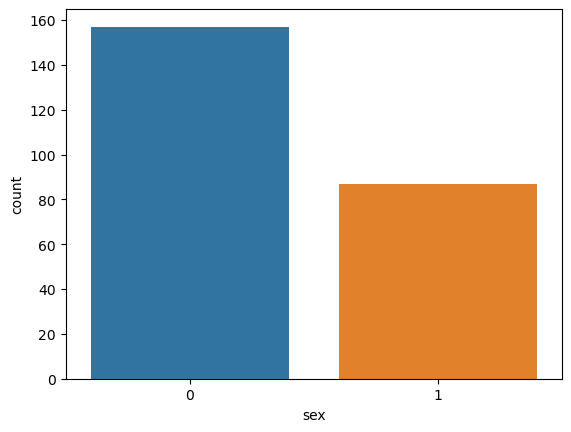

In [188]:
sns.countplot(data=data,x='sex')

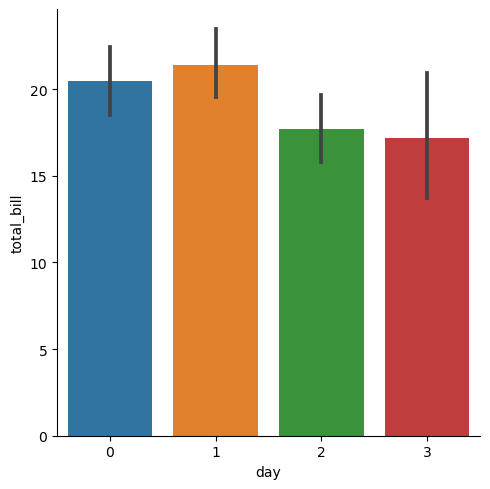

In [189]:
sns.catplot(data=data,x='day',y='total_bill',kind='bar')
data=data.drop('smoker',axis=1)

In [190]:
X = data.drop('tip', axis=1)
Y=data['tip']

In [203]:
print(X)

     total_bill  sex  day  time  size
0         16.99    1    1     0     2
1         10.34    0    1     0     3
2         21.01    0    1     0     3
3         23.68    0    1     0     2
4         24.59    1    1     0     4
..          ...  ...  ...   ...   ...
239       29.03    0    0     0     3
240       27.18    1    0     0     2
241       22.67    0    0     0     2
242       17.82    0    0     0     2
243       18.78    1    2     0     2

[244 rows x 5 columns]


In [204]:
print(Y)

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64


In [193]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [194]:
print(X.shape,X_train.shape,X_test.shape)

(244, 5) (195, 5) (49, 5)


In [195]:
regressor= LinearRegression()
regressor.fit(X_train,Y_train)
test_data_prediction=regressor.predict(X_test)
mse=metrics.mean_squared_error(Y_test,test_data_prediction)
print(f"Linear Regression:  {mse}")

Linear Regression:  0.8614139441462821


In [196]:
rf=RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train,Y_train)
test_data_prediciton=rf.predict(X_test)
mse=metrics.mean_squared_error(Y_test,test_data_prediction)
print(f"Random Foresr:   {mse}")

Random Foresr:   0.8614139441462821


In [197]:
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_regressor.fit(X_train, Y_train)
test_data_prediction=dt_regressor.predict(X_test)
mse=metrics.mean_squared_error(Y_test,test_data_prediciton)
print(f"DecisionTree Regression :   {mse}")

DecisionTree Regression :   1.144944437432089


In [198]:
X.columns

Index(['total_bill', 'sex', 'day', 'time', 'size'], dtype='object')

In [199]:
input_data=[1000,1,0,1,2]
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=regressor.predict(input_data_reshaped)
print(f"The tip is of: {prediction[0]}")

The tip is of: 85.75869361858085


C:\Users\Vansh Dhiman\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### 

In [200]:
import pickle

In [201]:
pickle.dump((regressor),open('regressor_lr.pkl','wb'))
regressor.lr=pickle.load(open('regressor_lr.pkl','rb'))